# Assignment #02 - Introduction to DS tools


Data Science / spring 1401, University of kordestan



---



**Please pay attention to these notes:**
<br><br>


- **Assignment Due:** <b><font color='red'>1401/3/27</font></b> 23:59:00
- The items you need to answer are highlighted in <font color="purple">**bold purple**</font> and the coding parts you need to implement are denoted by:
```
########################################
#     Put your implementation here     #
########################################
```
- We always recommend co-operation and discussion in groups for assignments. However, **each student has to finish all the questions by him/herself**. If our matching system identifies any sort of copying, you'll be responsible for consequences.
- You must run this notebook on Google Colab platform, it depends on Google Colab VM for some of the depencecies.
- You can double click on collapsed code cells to expand them.
- <b><font color='red'>When you are ready to submit, please follow the instructions at the end of this notebook.</font></b>


<br>




---



# Introduction

In this assignment, you will:
- Work with some famous machine learning libraries such as **NumPy, Pandas, Matplotlib** and **sklearn** 
- Learn how to visualize data
- Solve a simple practical classification task 



Most of the required libraries including numpy, pandas, and matplotlib are already installed on colab environment; However, in this assignment you are going to use **Basemape** toolkit for matplotlib which is not installed. So please run the following cell and restart your runtime to finish the installation before going through the rest of the assignment:  

In [3]:
#@title Install Basemap! (run the cell and restart your runtime afterward)
!apt-get install libgeos-3.6.2 
!apt-get install libgeos-dev 
!pip install git+https://github.com/matplotlib/basemap#subdirectory=packages/basemap

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-3.6.2 is already the newest version (3.6.2-1build2).
libgeos-3.6.2 set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree       
Reading state information... Done
libgeos-dev is already the newest version (3.6.2-1build2).
libgeos-dev set to manually installed.
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/matplotlib/basemap to /tmp/pip-req-build-trpsf1gc
  Running command git clone -q h

# 1 . Covid-19 

There is no doubt that everyone's life has been through many changes since Corona-Virus appeared. It is the most serious concern in the world right now, and many attempts have been made to help the world recover. Hence, machine learning has been widely used all over the globe, to either predict the future or describe the current situation of the disaster. 

The first step to every machine learning problem is to have an insight into the data. In this assignment, we are going to take a look at how Covid-19 has been spread over the world, by visualizing the number of cases over time.



*   <font color='green'>First download the data by running the following cell:</font> 




In [4]:
#@title Download the data!
from IPython.display import clear_output

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1GqeCnO2TUI4kDqsxVZYdMGL6J3mvsIrS' -O Confirmed.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1o0OonLudsargCRJ8q4NTUhlgDZdJJ-xd' -O Death.csv
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1o9rqSNL6XrjayYHBYZxyY60NkOgRTSFz' -O Recovered.csv

clear_output()
print ("Done!")

Done!



*   <font color='green'>Now read the dataset in Pandas DataFrame format using the following cell:</font> 



In [5]:
#@title Read the datasets!
import pandas as pd

confirmed = pd.read_csv ("/content/Confirmed.csv")
death = pd.read_csv ("/content/Death.csv")
recovered = pd.read_csv ("/content/Recovered.csv")

print ("Done!")

Done!



*   <font color='green'>Now let's take a quick look at the "confirmed" dataset:</font> 


In [6]:
#@title Take a look!
recovered.head(n=10)

Province/State       Country/Region       Lat        Long  \
0                           NaN          Afghanistan  33.93911   67.709953   
1                           NaN              Albania  41.15330   20.168300   
2                           NaN              Algeria  28.03390    1.659600   
3                           NaN              Andorra  42.50630    1.521800   
4                           NaN               Angola -11.20270   17.873900   
5                           NaN  Antigua and Barbuda  17.06080  -61.796400   
6                           NaN            Argentina -38.41610  -63.616700   
7                           NaN              Armenia  40.06910   45.038200   
8  Australian Capital Territory            Australia -35.47350  149.012400   
9               New South Wales            Australia -33.86880  151.209300   

   1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  ...  10/30/20  \
0        0        0        0        0        0        0  ...     34258   
1        0        0        0        0        0        0  ...     11097   
2        0        0        0        0        0        0  ...     40014   
3        0        0        0        0        0        0  ...      3377   
4        0        0        0        0        0        0  ...      4107   
5        0        0        0        0        0        0  ...       116   
6        0        0        0        0        0        0  ...    961101   
7        0        0        0        0        0        0  ...     54316   
8        0        0        0        0        0        0  ...       111   
9        0        0        0        0        0        0  ...      3148   

   10/31/20  11/1/20  11/2/20  11/3/20  11/4/20  11/5/20  11/6/20  11/7/20  \
0     34321    34326    34342    34355    34362    34440    34440    34446   
1     11189    11246    11367    11473    11578    11696    11861    12002   
2     40201    40395    40577    40577    41001    41244    41510    41783   
3      3475     3475     3548     3627     3734     3858     3858     4043   
4      4523     4920     5172     5230     5266     5350     5626     5647   
5       117      117      117      117      118      118      118      122   
6    973939   985316   998016  1009278  1017647  1030137  1042237  1053313   
7     55317    55827    56466    57599    58811    60135    61782    63258   
8       111      111      111      111      111      111      111      111   
9      3148     3148     3148     3150     3151     3153     3153     3156   

   11/8/20  
0    34458  
1    12092  
2    42037  
3     4248  
4     5899  
5      122  
6  1062911  
7    64179  
8      111  
9     3156  

[10 rows x 296 columns]


In this part, you are going to <font color="purple">**create a simple scatter plot comparing the trend of confirmed, dead, and recovered cases in Iran**</font> (Country/Region = Iran) by following these steps:

Your plot should be similar to this one (drawn for United States) and have the following properties:

*   <font color='green'>a single 45 degree angled X-axis tick per 20 days</font> 
*   <font color='green'>a legend</font> 
*   <font color='green'>axis labels</font> 
*   <font color='green'>log-scaled Y-axis</font> 



<p align="center"><img src="https://drive.google.com/uc?id=10yvruyXcJbYC302pOg1x0hI4ynhTgNQc" width="600"/></p>




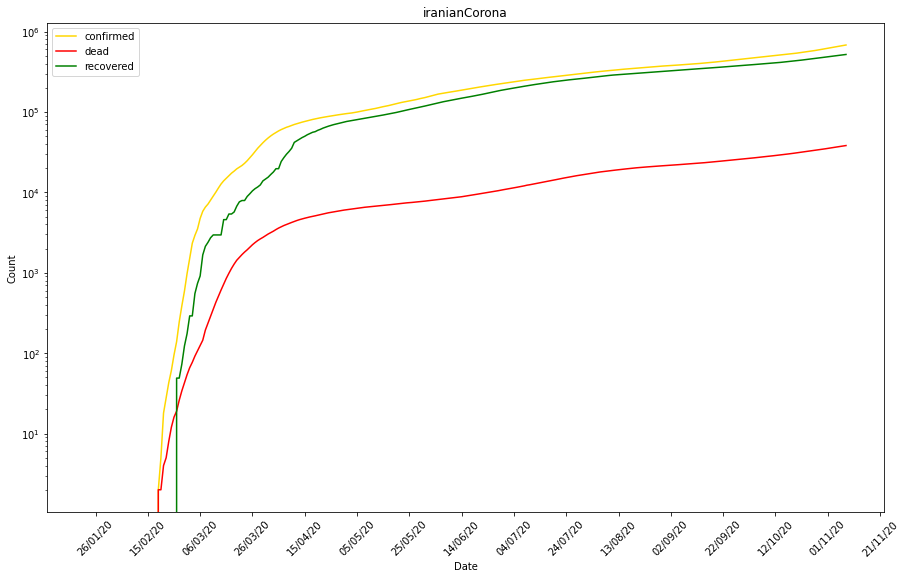

In [7]:
from functools import reduce
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates


def clean(dataframe, name):
  df = dataframe.drop(columns=['Province/State', 'Country/Region' ,'Lat', 'Long'])
  df = df.stack().reset_index()
  df.rename(columns={0: name,'level_1':'date'}, inplace=True)
  return df

iranianRecover = clean(recovered[recovered['Country/Region'] == 'Iran'], 'recovered')
iranianDead = clean(death[death['Country/Region'] == 'Iran'], 'dead')
iranianConfirmed = clean(confirmed[confirmed['Country/Region'] == 'Iran'], 'confirmed')

iranianCorona = pd.DataFrame(columns={'date', 'recovered', 'dead', 'confirmed'})

iranianCorona['date'] = iranianDead.apply(lambda row: row.date, axis=1).astype('datetime64')
iranianCorona['dead'] = iranianDead.apply(lambda row: row.dead , axis=1)
iranianCorona['confirmed'] = iranianConfirmed.apply(lambda row: row.confirmed , axis=1)
iranianCorona['recovered'] = iranianRecover.apply(lambda row: row.recovered , axis=1)
iranianCorona = iranianCorona.set_index(['date'])


fig, ax = plt.subplots(figsize=(15, 9))

ax.plot(iranianCorona.index, iranianCorona['confirmed'], label='confirmed', color = 'gold')
ax.plot(iranianCorona.index, iranianCorona['dead'], label='dead', color = 'r')
ax.plot(iranianCorona.index, iranianCorona['recovered'], label='recovered', color = 'g')

ax.set(title="iranianCorona", xlabel="Date", ylabel="Count")

ax.legend()
ax.xaxis.set_major_locator(mdates.DayLocator(interval=20))
ax.xaxis.set_major_formatter(DateFormatter("%d/%m/%y"))
ax.tick_params(axis='x', rotation=45)

ax.set_yscale("log")
plt.show()

<font color="purple">**Drop all useless columns, including the old `recommend` column.**</font> Dont doubt if it seems too easy! :)

<font color="purple">**Drop all useless columns, including the old `recommend` column.**</font> Dont doubt if it seems too easy! :)



```
# This is formatted as code
```

You can draw markers on the map with different sizes using the following function:

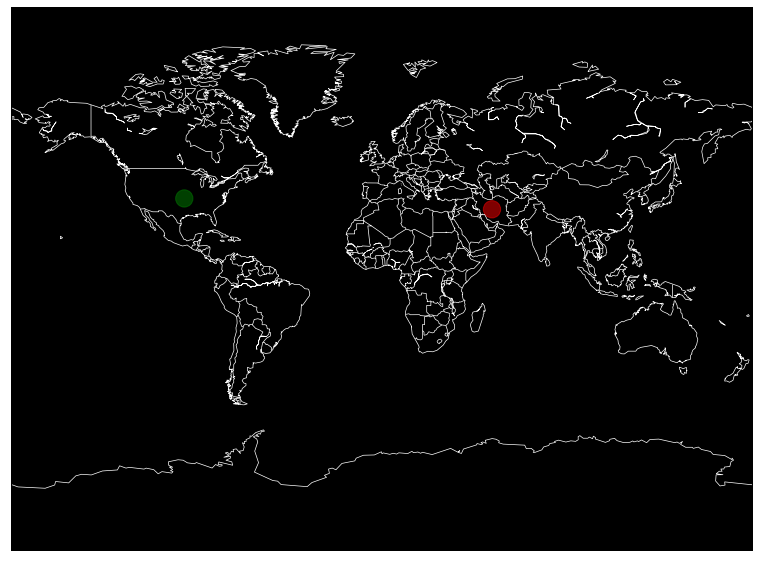

In [8]:
#@title draw_on_map function

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap



def draw_on_map (color="r", markersize=20, lon=0, lat=0, ax=None):
    """
    Draws markers on the map on specified longitudes and latitudes  

    Parameters
    ----------
    color : str/list of str
        A single string indicating the color of all the markers or 
        a list of strings indicating the color of each marker. Possible
        string values are "r" for red, "g" for green, "y" for yellow and
        "b" for blue.

    markersize : integer/list of integer
        A single integer indicating the radius of all the markers or 
        a list of integers indicating the radius of each marker.
        
    lon : integer/list of integer
        A single integer indicating the longitude of a single marker or 
        a list of integers indicating the longitude of each marker.


    lat : integer/list of integer
        A single integer indicating the latitude of a single marker or 
        a list of integers indicating the latitude of each marker.

    ax : matplotlib.axes
        The matplotlib axes on which the plot is drawn.

    """
    ax.clear()
    
    m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,\
                llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=ax)

    m.drawcoastlines(color='white', linewidth=.7)
    m.drawcountries(color='white', linewidth=.7)
    m.drawmapboundary(fill_color='black')
    xpt,ypt = m(lon,lat)
    ax.scatter (xpt,ypt, color=color, s=markersize, alpha=0.5)



######## testing the function ########

iran_lon = 53.6880
iran_lat = 32.4279 

us_lon = -95.7129
us_lat = 37.0902

fig, axis = plt.subplots (figsize=(20,10))

draw_on_map(color=["r", "g"],
            markersize=[300, 300],
            lon=[iran_lon, us_lon],
            lat=[iran_lat, us_lat],
            ax=axis)

fig.show()

Now, using the above function, you must <font color="purple">**implement the following `vis_covid` function which takes the time index `i` and a `dataset` as input and draws markers on the longitudes and latitudes specified in the dataset. The radius of each marker must correspond to the number of cases indicated for the i-th time entry of that specific longitude and latitude which the marker is drawn for; The larger the number of the cases, the bigger the radius of the marker.** </font>

For example, if we pass the "confirmed" dataset, for `i = 0`, `100` and `200` (which specify dates `1.22.2020`, `5.1.2020` and `8.9.2020` respectively), we should get the following outputs:
</br>



<p align="center"><img src="https://drive.google.com/uc?id=1gfu6LBhffwd0tx78VKy5T9IAwM_TbJwy" width="1100"/></p>



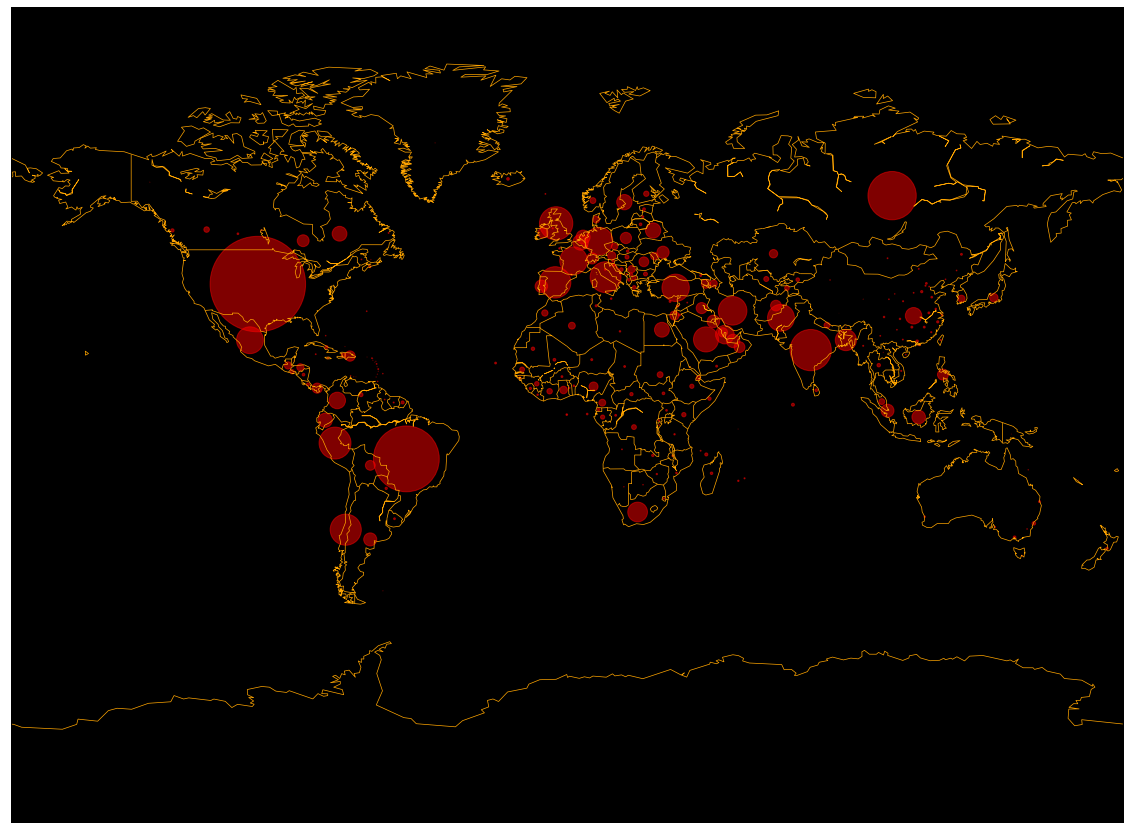

In [23]:
#@title Your part #2

def vis_covid (i, color, dataset, ax):
    """
    Draws markers on the map on specified longitudes and latitudes  

    Parameters
    ----------
    i : integer
        A single integer indicating the index of time entry in the dataset.

    color : str
        A single string indicating the color of all the markers.
        
    dataset : pandas.DataFrame
        The given dataset to be visualised.

    ax : matplotlib.axes
        The matplotlib axes on which the plot is drawn.

    """
    ax.clear()
    
    m = Basemap(projection='mill',llcrnrlat=-90,urcrnrlat=90,
                llcrnrlon=-180,urcrnrlon=180,resolution='c', ax=ax)
    
    m.drawcoastlines(color='orange', linewidth=.7)
    m.drawcountries(color='orange', linewidth=.7)
    m.drawmapboundary(fill_color='black')
    xpt,ypt = m(dataset.iloc[:]['Long'],dataset.iloc[:]['Lat'])
    confd = [x/(i+100) for x in list(dataset.iloc[:, i+5])]
    ax.scatter (xpt,ypt, color=color, s=confd, alpha=0.5)

######## testing the function ########

fig, axis = plt.subplots (figsize=(30,15))
vis_covid (150, "r", confirmed, axis)
fig.show()


Now let's make an animation using the function you just implemented! (this may take a while, be patient)

frame  0 / 60  rendered!


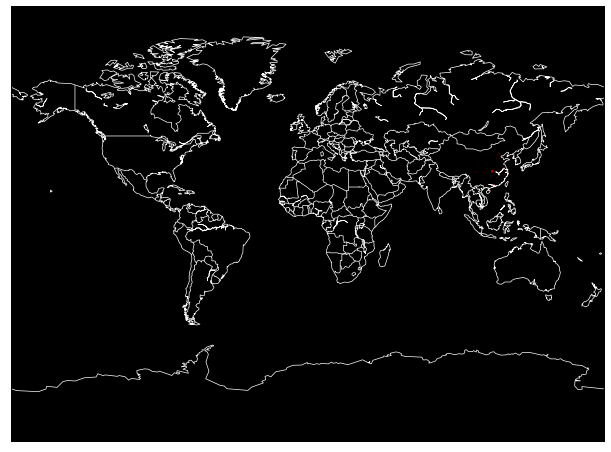

In [10]:
#@title Create the animation
from matplotlib.animation import FuncAnimation
from matplotlib import rc
from IPython.display import clear_output
rc('animation', html='jshtml')

fig, axis = plt.subplots (figsize=(15,8))
frames = 60

def animate(i):
  clear_output()
  print ("frame ", i, "/", frames, " rendered!")
  vis_covid (i*4, "r", confirmed, axis)
  

ani = FuncAnimation(fig, animate, frames=frames, interval=30);
ani.save('covid_spread.gif', writer='pillow', fps=30, dpi=50);

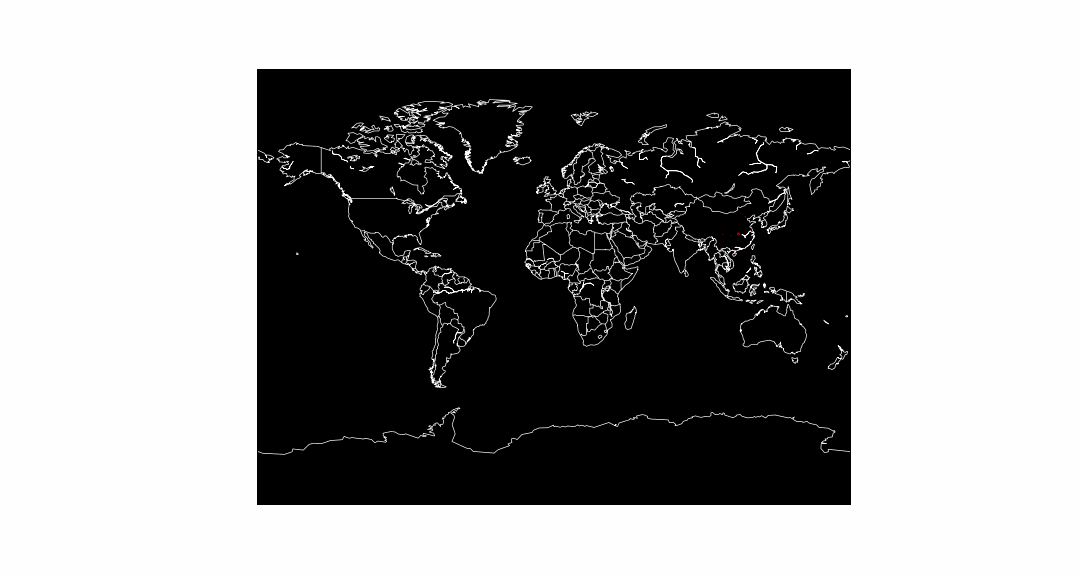

In [11]:
#@title Display the animation!
from IPython.display import Image
Image(open('/content/covid_spread.gif','rb').read())

# 2 . Fa_MNIST 

Now let's have some fun with NumPy! In this assignment, we are going to implement the **K-means** clustering algorithm using NumPy and apply it to some image data.

We are going to use ["Hoda": a Persian hand-written digits dataset](http://farsiocr.ir/%D9%85%D8%AC%D9%85%D9%88%D8%B9%D9%87-%D8%AF%D8%A7%D8%AF%D9%87/%D9%85%D8%AC%D9%85%D9%88%D8%B9%D9%87-%D8%A7%D8%B1%D9%82%D8%A7%D9%85-%D8%AF%D8%B3%D8%AA%D9%86%D9%88%DB%8C%D8%B3-%D9%87%D8%AF%DB%8C/) for this assignment. Let's download the dataset by running the following cell:

In [12]:
#@title Download the data!
from IPython.display import clear_output

!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1sd5hIgupwPipkokqIXhD5qcKgHxl7C8B' -O Data.np
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1SWdZMXWkHAgTuCcuz3Ydm81hgWwi-bYe' -O Label.np

clear_output()
print ("Done!")

Done!


In [13]:
#@title Read the datasets!
import numpy as np

data = np.load("/content/Data.np", allow_pickle=True)
labels = np.load("/content/Label.np", allow_pickle=True)

print ("The dataset is a",
       type(data),
       "with",
       len(data),
       type(data[0]),
       "elements!")
print ("data.shape is:", data.shape)

The dataset is a <class 'numpy.ndarray'> with 60000 <class 'numpy.ndarray'> elements!
data.shape is: (60000,)


As you can see, our dataset is an array of arrays. However, the dimension of the array is one, which means the elements are stored as objects since they have different shapes. We can observe this fact if we visualize a few instances of our data:

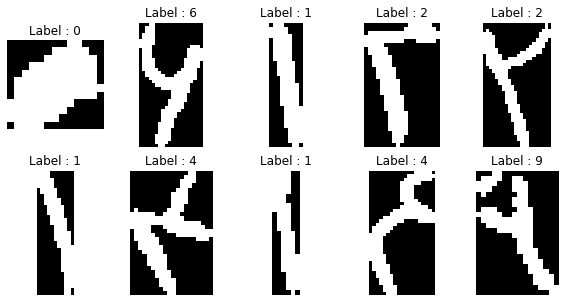

In [14]:
#@title Visualize!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(10,5))

sampled_indices = np.random.randint(data.shape[0], size=10)
sampled = data[sampled_indices]
sampled_labels = labels[sampled_indices]

for row in range (2):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

In most of the machine learning algorithm pipelines, we usually want our image dataset to have a consistent sample shape. Therefore, the first step is normally to either pad or crop the images to make them square-shaped, and then rescale the images to make them have the same size.
Here, you are going to <font color="purple">**implement a function which given the initial dataset and a final output image size S**</font>:
 

1.   <font color='green'>For each image in the dataset, if its width is greater than its heigh, pad the heigh equally from both sides with 0 until it's equal with the width, and vice-versa.</font> 
2.   <font color='green'>Scale each image to have shape (S, S). You can use [OpenCV resize](https://www.tutorialkart.com/opencv/python/opencv-python-resize-image/) method for this purpose</font>  


In [15]:
#@title Your part #1
import numpy as np
import cv2


def reshape_images(dataset, size):
  """
  Pads and rescales images in the given dataset.  

  Parameters
  ----------
  dataset : numpy.array/list of numpy.arrays
      The given dataset on which we are doing the padding and scaling on.

  size : integer
      The final shape of each image will be (size, size) 


  Returns
  -------
  reshaped_dataset : numpy.ndarray
  
  Final reshaped dataset as a numpy ndarray with shape (len(dataset), size, size)

  """

  reshaped_dataset = []
  for i in range (len(dataset)):
    img = dataset[i]
    img = cv2.resize(img, (size, size))
    reshaped_dataset.append(img)
  return np.array(reshaped_dataset)


######## using the function ########

scaled_data = reshape_images(data, size=28)
scaled_data.shape

assert scaled_data.shape == (60000, 28, 28), "Your output shape is wrong!"


Now, each sample is a 28x28 pixel image. 
Let's visualize few samples again to see the result of scaling:

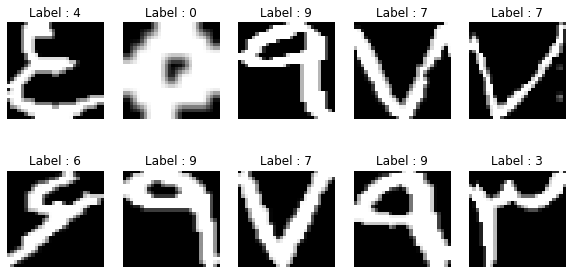

In [16]:
#@title Visualize!

import matplotlib.pyplot as plt

fig, ax = plt.subplots(2, 5, figsize=(10,5))

sampled_indices = np.random.randint(scaled_data.shape[0], size=10)
sampled = scaled_data[sampled_indices]
sampled_labels = labels[sampled_indices]

for row in range (2):
  for col in range (5):
    sample = sampled[row*5 + col]
    label = sampled_labels[row*5 + col]
    ax[row][col].imshow(sample, cmap='gray')
    ax[row][col].axis('off')
    ax[row][col].set_title("Label : "+ str(label))
fig.show()

Nice and easy! 

The most simple representation of each sample would be if we consider the value of each pixel as a feature, hence representing each image with a 784-d vector (28x28 = 784).

In [17]:
#@title Pixle values as image features
data_flatten = scaled_data.reshape((scaled_data.shape[0], -1))
print ("New dataset shape is ", data_flatten.shape)

New dataset shape is  (60000, 784)


It is always nice if possible to observe your data points visually. However, in this case, our data points are in a 784-dimensional space, and can not be plotted as they are. Using **PCA (principal component analysis)**, we can find the n-most important directions of the space on which our data is scattered (n directions in which the most variance of the data is explained). So, using this technique we can reduce the dimensions to 2 and have a visualization of our data:

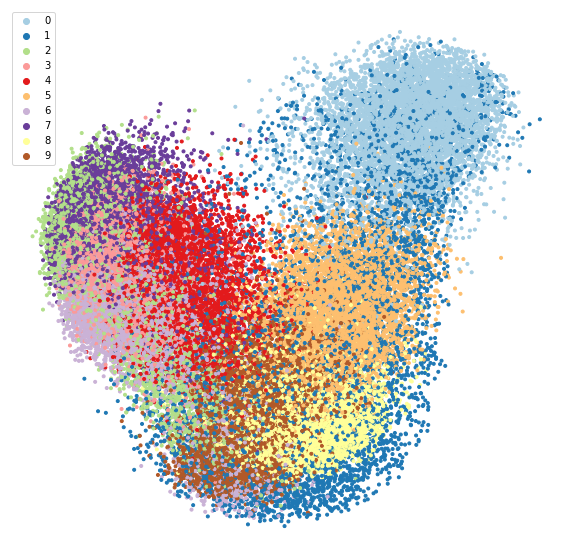

In [18]:
1#@title PCA visualization
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

pca = PCA(n_components=2).fit(data_flatten)
data_transformed = pca.transform(data_flatten)


fig, ax = plt.subplots(figsize=(10,10))
scatter = ax.scatter (data_transformed[:,0], data_transformed[:,1], marker=".", c=labels, cmap="Paired")
classes = list(range(10))
ax.legend(handles=scatter.legend_elements()[0], labels=classes)
ax.axis('off')
fig.show()

As you can see, some of the numbers are overlapping more than the others (1, 2, and 3); On the other hand, some of them are clearly separated (7 and 8). This is caused by the way we represented our images. All a neural network does is to find a better representation for each image (by finding more meaningful and distinct features than raw pixel values) to make them more separated in the representation space. 

Anyway, this is not what we are here for, not yet! We want to <font color="purple">**implement K-means**</font>, a well-known clustering algorithm! 

Clustering is one of the most common exploratory data analysis techniques used to get an intuition about the structure of the data. It can be defined as the task of identifying subgroups in the data such that data points in the same subgroup (cluster) are more similar (based on a pre-defined similarity measure, often euclidean distance) than data points in different clusters. 

to implement K-means, follow these steps:


*   <font color='green'>Pick K random points as cluster centers called centroids.</font>
*   <font color='green'>Assign each data point​ to nearest cluster by calculating its euclidean-distance to each centroid.</font>
*   <font color='green'>Update the centroid to be the average of the assigned points.</font>
*   <font color='green'>Repeat Step 2 and 3 for some itterations.</font>

Look at this animation for a better understanding:

<p align="center"><img src="https://drive.google.com/uc?id=1FSWGOksL90HWIb6Zr5SY2strXml9kvHG" width="400"/></p>

To encourage using NumPy methods, <font color='red'> you are allowed to only use 3 for loops </font> (one of which is the outermost iterations loop! So, practically 2 loops are allowed).




In [19]:
#@title Your part #2
from tqdm.notebook import tqdm

iterations = 10
k = 40
dataset = data_flatten
centroids = np.random.randint(100, size=(k, 784))


cluster = []

labels = np.zeros(dataset.shape[0])

for i in tqdm(range(iterations)):
  for j in range(dataset.shape[0]):
    distances = np.linalg.norm(dataset[j] - centroids, axis=1)
    labels[j] = np.argmin(distances)
  for k in range(k):
    centroids[k] = np.mean(dataset[labels == k], axis=0)

print(centroids, labels)
print ("len :")
print(len(centroids), labels)

  0%|          | 0/10 [00:00<?, ?it/s]

[[ 10  22  21 ...   0   0   0]
 [  0   0   0 ... 205 174 111]
 [  0   0   0 ...   1   0   0]
 ...
 [  2   4   7 ... 160 118  73]
 [  9  14  27 ... 133 124  99]
 [ 24  29  35 ... 132 126  78]] [20. 24. 34. ... 15.  8.  5.]
len :
40 [20. 24. 34. ... 15.  8.  5.]


Now let's do something fun to see if your K-means implementation is correct. Each cluster center is a vector of 784 dimensions. However, we can reshape it back to a 28 by 28 image and visualize it. So let's do this and see if our cluster centers look anything like our data points:

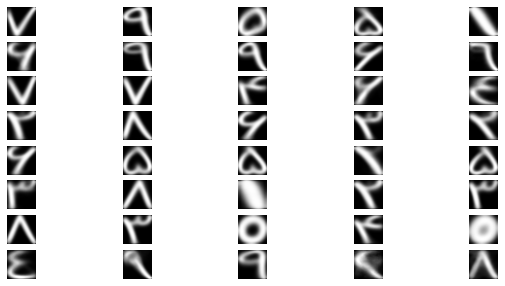

In [20]:
#@title Visualize centroids
import matplotlib.pyplot as plt

fig, ax = plt.subplots(8, 5, figsize=(10,5))

for row in range (8):
  for col in range (5):
    ax[row][col].imshow(centroids[row*5+col].reshape(28,28), cmap='gray')
    ax[row][col].axis('off')
fig.show()